In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ThesisDataSet.txt',delimiter = '\t')
data = data[:7600]
data = data['sentences']

In [3]:
total_sentences = len(data)
sentences = {'sad':0,
             'happy':0,
             'angry':0,
             'surprise':0,
             'disgust':0,
             'fear':0}
for sentence in data:
    sentences[sentence.split()[0].lower()]+= 1
sentences

{'sad': 1583,
 'happy': 2208,
 'angry': 1784,
 'surprise': 709,
 'disgust': 859,
 'fear': 457}

In [4]:
word_pool = {'sad':[],
             'happy':[],
             'angry':[],
             'surprise':[],
             'disgust':[],
             'fear':[]}

In [5]:
for sentence in data:
    splitted = sentence.split()
    for k in range(1,len(splitted)):
        word_pool[splitted[0].lower()].append(splitted[k])

In [6]:
all_words = []
for emotion in word_pool:
    for word in word_pool[emotion]:
        all_words.append(word)

In [7]:
all_distinct_words = set(all_words)
len(all_distinct_words)

23380

In [8]:
def prepare_dictionary(sentence):
    words_from_sentence = sentence.split()
    probabilty = dict()
    for word in words_from_sentence:
        probabilty[word] = [.0000001 for k in range(7)]
    for word in words_from_sentence:
        k = 0
        for emotion in word_pool:
            total = all_words.count(word)
            tw = word_pool[emotion].count(word)
            if not tw == 0:
                probabilty[word][k] = tw/total
            k += 1
        probabilty[word][k] = total/total_sentences
    return probabilty

In [9]:
prepare_dictionary('দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের মুলুকের দেশে পরিনত হচ্ছে?')

{'দেশকি': [1e-07, 1e-07, 1.0, 1e-07, 1e-07, 1e-07, 0.00013157894736842105],
 'মধ্যম': [1e-07, 1e-07, 1.0, 1e-07, 1e-07, 1e-07, 0.0002631578947368421],
 'আয়ের': [1e-07, 1e-07, 0.2, 0.8, 1e-07, 1e-07, 0.0006578947368421052],
 'দেশে': [0.3442622950819672,
  0.11475409836065574,
  0.19672131147540983,
  0.12295081967213115,
  0.13934426229508196,
  0.08196721311475409,
  0.032105263157894734],
 'রুপান্তর': [1e-07, 1e-07, 1.0, 1e-07, 1e-07, 1e-07, 0.00013157894736842105],
 'হচ্ছে': [0.27906976744186046,
  0.17829457364341086,
  0.13178294573643412,
  0.17829457364341086,
  0.14728682170542637,
  0.08527131782945736,
  0.016973684210526314],
 'নাকি': [0.1,
  0.05,
  0.39166666666666666,
  0.20833333333333334,
  0.20833333333333334,
  0.041666666666666664,
  0.015789473684210527],
 'মগের': [1e-07, 1e-07, 0.4, 1e-07, 0.2, 0.4, 0.0006578947368421052],
 'মুলুকের': [1e-07, 1e-07, 1.0, 1e-07, 1e-07, 1e-07, 0.00013157894736842105],
 'পরিনত': [0.3333333333333333,
  1e-07,
  0.3333333333333333,
  0.1

In [10]:
def count_probabilityNB(sentence):
    probability = prepare_dictionary(sentence)
    prob = [1 for _ in range(6)]
    for k in range(6):
        for word in sentence.split():
            if not word in all_words:
                prob[k] *= 1
            else:
                prob[k] *= probability[word][k]*probability[word][-1]
    return prob

In [11]:
count_probabilityNB('এবার লোকসমাগম খুব কম হয়েছে যা প্রশ্নই থেকে যায় কেন ?')

[2.3667874374676266e-44,
 6.834822010675844e-45,
 3.0993768939283807e-45,
 1.967004240166738e-33,
 7.926244653252837e-47,
 4.294928928346206e-61]

<BarContainer object of 6 artists>

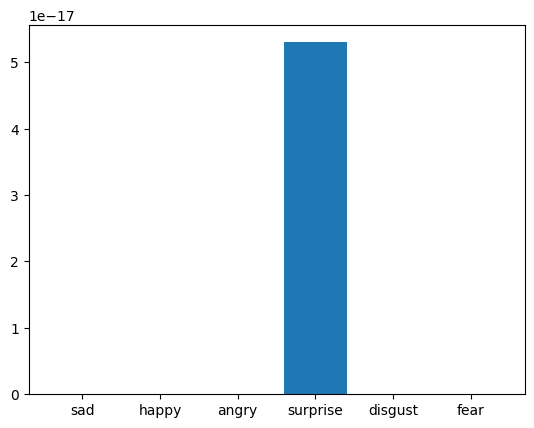

In [12]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('এবার লোকসমাগম খুব হয়েছে !'))

<BarContainer object of 6 artists>

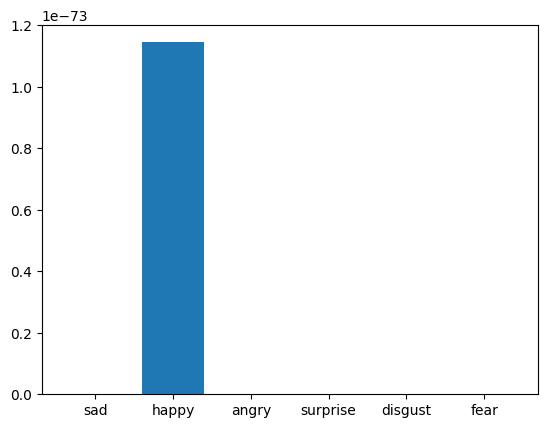

In [13]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধা। আমি চির রণবীর। আমি আল্লাহ ছারা কারও কাছে নিচু করি না আমার শির। নারায়ে তাকবির আল্লাহু আকবর।'))

<BarContainer object of 6 artists>

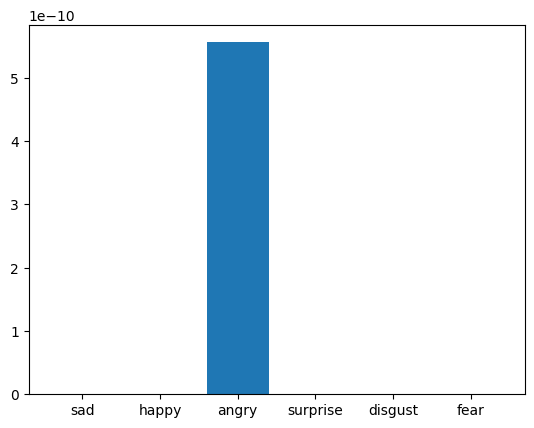

In [14]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('নাস্তিকরা কমতেছে তো'))

<BarContainer object of 6 artists>

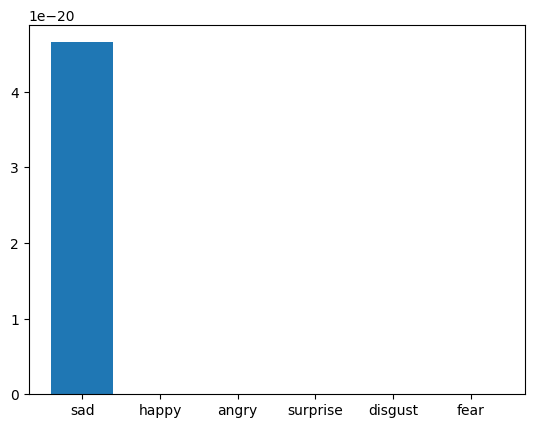

In [15]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('বহু বছরের পুরনো স্মৃতি মনে পারছে,'))

<BarContainer object of 6 artists>

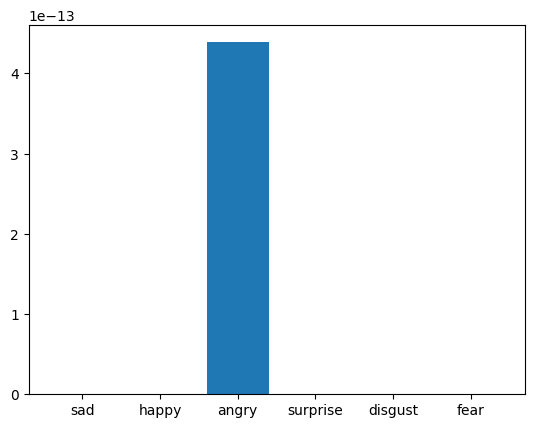

In [16]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('ওটা আপনার লোকেরাই করছে।'))

<BarContainer object of 6 artists>

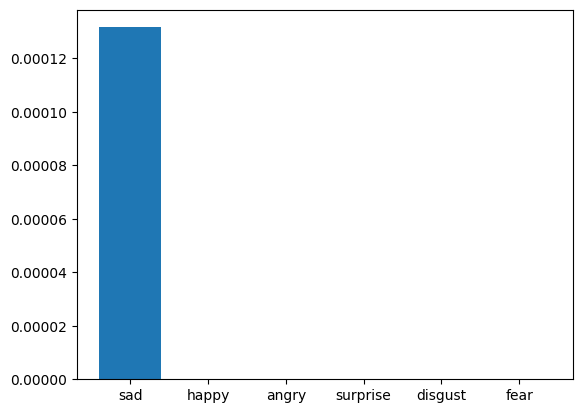

In [18]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('জীবনডা বেদনা'))

<BarContainer object of 6 artists>

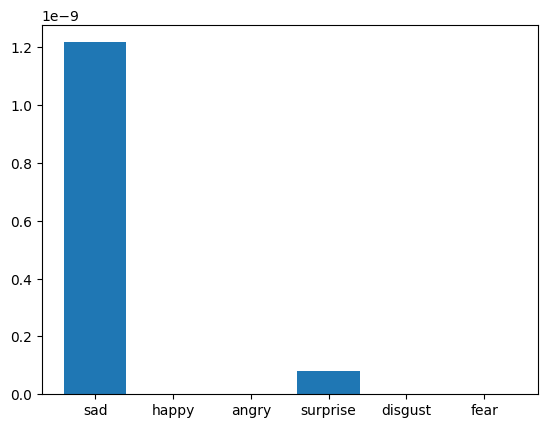

In [19]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('এ দুঃখ ভারাক্রান্ত হৃদয়'))

In [20]:
def useful_substrings(wrd):
    sbstrings = []
    if len(wrd) <= 3:
        for k in range(1,len(wrd)+1):
            sbstrings.append(wrd[:k])
    else:
        for k in range(len(wrd)-3,len(wrd)+1):
            sbstrings.append(wrd[:k])
    return sbstrings

In [21]:
useful_substrings('জীবনডা')

['জীব', 'জীবন', 'জীবনড', 'জীবনডা']

In [22]:
def cut(wrd):
    wrds = []
    for k in range(1,len(wrd)):
        wrds.append(wrd[:k])
        wrds.append(wrd[k:])
    return wrds

In [23]:
cut('জীবনডা')

['জ', 'ীবনডা', 'জী', 'বনডা', 'জীব', 'নডা', 'জীবন', 'ডা', 'জীবনড', 'া']

In [24]:
def lookup_wrds(wrd):
    return set(useful_substrings(wrd)+cut(wrd))

In [25]:
lookup_wrds('জীবনডা')

{'জ',
 'জী',
 'জীব',
 'জীবন',
 'জীবনড',
 'জীবনডা',
 'ডা',
 'নডা',
 'বনডা',
 'া',
 'ীবনডা'}

In [26]:
def prepare_dictionary_s(sentence):
    words_from_sentence = sentence.split()
    probabilty = dict()
    for word in words_from_sentence:
        for w in lookup_wrds(word):
            probabilty[w] = [.0000001 for k in range(7)]
    for word in words_from_sentence:
        for w in lookup_wrds(word):
            k = 0
            for emotion in word_pool:
                total = all_words.count(w)
                tw = word_pool[emotion].count(w)
                if not tw == 0 :
                    probabilty[w][k] = tw/total
                k += 1
            probabilty[w][k] = total/total_sentences
    return probabilty

In [27]:
def count_probabilityNB_s(sentence):
    probability = prepare_dictionary_s(sentence)
    prob = [1 for _ in range(6)]
    for k in range(6):
        for word in sentence.split():
            for w in lookup_wrds(word):
                if not w in all_words:
                    prob[k] *= 1
                else:
                    prob[k] *= probability[w][k]*probability[w][-1]
    return prob

<BarContainer object of 6 artists>

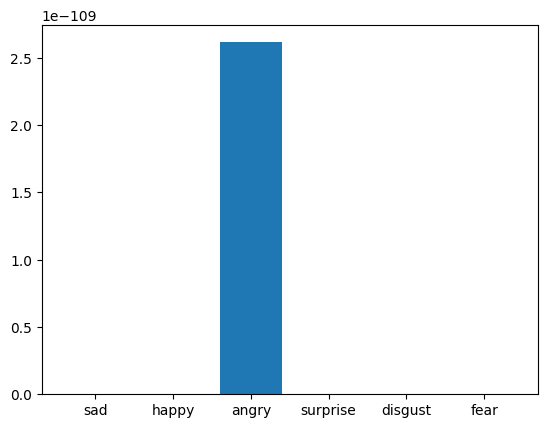

In [29]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB_s('ওটা আপনার লোকেরাই করছে।'))

<BarContainer object of 6 artists>

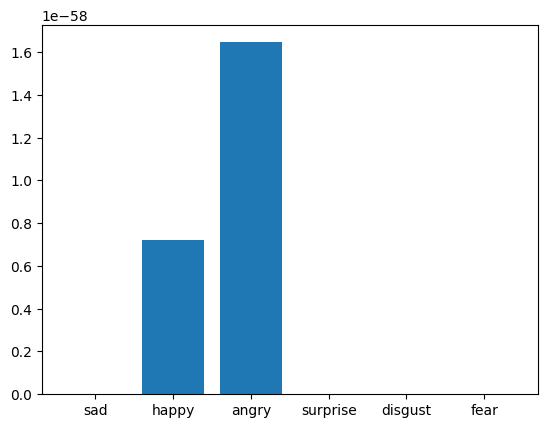

In [30]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB_s('জীবনডা বেদনা'))

In [31]:
data = pd.read_csv('ThesisDataSet.txt',delimiter = '\t')
tdata = data[7600:]
tdata = tdata['sentences']
tdata

7600    Disgust        ধন্যবাদ পুলিশকে, কিন্তু এই ধরনে...
7601               Angry        হের মায়ে কোই জানি মোনে হয়
7602    Disgust        তুই (ইমরান) কেন ৪ বছর বয়ষেই হার...
7603    Disgust        বাচ্চার মা ও বাবাকে ২ দিন থানায়...
7604    Disgust        সেই প্রকৃত পুরুষ যে ঘর জামাই থে...
                              ...                        
7919    Surprise        ভারতে প্রতিদিন ১৮ টা রেপ কেইস ...
7920                    Surprise        এই কি স্বাধীন দেশ
7921    Sad        স্বাধীন দেশের নাগরিক হয়ে ও আজ আমরা ...
7922    Sad        আমরা মানুষের মত হয়ে বাচতে চায়,পরাধী...
7923    Sad        বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজ...
Name: sentences, Length: 324, dtype: object

In [32]:
total = len(tdata)

In [33]:
def make_sentence(tdata):
    sentences = []
    for line in tdata:
        sentence = ''
        for wrd in line.split()[1:]:
            sentence += wrd+' '
        sentences.append(tuple([sentence,line.split()[0]]))
    return sentences

In [34]:
sentences = make_sentence(tdata)

In [35]:
def test(sentences):
    correct = 0
    total = len(sentences)
    reactions = ['Sad','Happy','Angry','Surprise','Disgust','Fear']
    for sentence in sentences:
        probs = count_probabilityNB(sentence[0])
        if(reactions[probs.index(max(probs))] == sentence[1]):
            correct += 1
    return 100*correct/total

In [36]:
test(sentences)

93.82716049382717